In [1]:
import  requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from scipy.cluster.vq import whiten, kmeans2

In [3]:
def call_api(uri, result_key):
    json = {}
    try:
        json = requests.get(uri, headers = { 'X-Auth-Token': '6343e2401b274e4b9d3233b7291115e5' }).json()
        return json[result_key]
    except:
        print(json)
        return None

In [4]:
teams = call_api('http://api.football-data.org/v1/soccerseasons/439/teams', 'teams')

In [5]:
for team in teams:
    fixtures = call_api(team['_links']['fixtures']['href'], 'fixtures')
    loses = 0
    for f in fixtures:
        if (team['name'] == f['homeTeamName'])and(f['result']['goalsHomeTeam']<f['result']['goalsAwayTeam']):
                loses+= 1
        if (team['name'] == f['awayTeamName'])and(f['result']['goalsAwayTeam']<f['result']['goalsHomeTeam']):
                loses+= 1
    print('Team "{}", {} loses'.format(team['name'], loses))
    team['loses'] = loses

Team "FC Rio Ave", 13 loses
Team "FC Porto", 5 loses
Team "Moreirense FC", 18 loses
Team "FC Paços de Ferreira", 18 loses
Team "Sporting CP", 7 loses
Team "Maritimo Funchal", 13 loses
Team "CD Tondela", 16 loses
Team "SL Benfica", 9 loses
Team "Boavista Porto FC", 15 loses
Team "FC Arouca", 0 loses
Team "Vitoria Setubal", 16 loses
Team "C.F. Os Belenenses", 15 loses
Team "Vitoria Guimaraes", 17 loses
Team "Sporting Braga", 7 loses
Team "GD Estoril Praia", 20 loses
Team "Feirense", 21 loses
Team "Nacional Funchal", 0 loses
Team "G.D. Chaves", 13 loses


In [6]:
team_for_pd = []
for team in teams:
    if team['name']:
        team_for_pd.append({'name': team['name'], 'loses': team['loses']})
team_for_pd

[{'loses': 13, 'name': 'FC Rio Ave'},
 {'loses': 5, 'name': 'FC Porto'},
 {'loses': 18, 'name': 'Moreirense FC'},
 {'loses': 18, 'name': 'FC Paços de Ferreira'},
 {'loses': 7, 'name': 'Sporting CP'},
 {'loses': 13, 'name': 'Maritimo Funchal'},
 {'loses': 16, 'name': 'CD Tondela'},
 {'loses': 9, 'name': 'SL Benfica'},
 {'loses': 15, 'name': 'Boavista Porto FC'},
 {'loses': 0, 'name': 'FC Arouca'},
 {'loses': 16, 'name': 'Vitoria Setubal'},
 {'loses': 15, 'name': 'C.F. Os Belenenses'},
 {'loses': 17, 'name': 'Vitoria Guimaraes'},
 {'loses': 7, 'name': 'Sporting Braga'},
 {'loses': 20, 'name': 'GD Estoril Praia'},
 {'loses': 21, 'name': 'Feirense'},
 {'loses': 0, 'name': 'Nacional Funchal'},
 {'loses': 13, 'name': 'G.D. Chaves'}]

In [9]:
teams_pd = pd.DataFrame(team_for_pd)
teams_pd['cost'] = np.random.randint(1000000,1000000000, size=len(teams_pd['loses']))
del teams_pd['name']
teams_pd

,loses,cost
0,13,353706145
1,5,607895845
2,18,465084504
3,18,45676427
4,7,752031896
5,13,996636092
6,16,459551084
7,9,249780804
8,15,494899580
9,0,740579505


In [11]:
whitened = whiten(teams_pd.as_matrix())
whitened

array([[ 2.10231472,  1.31404323],
       [ 0.80858258,  2.25837586],
       [ 2.9108973 ,  1.72782168],
       [ 2.9108973 ,  0.16969114],
       [ 1.13201562,  2.79385144],
       [ 2.10231472,  3.70257325],
       [ 2.58746427,  1.70726463],
       [ 1.45544865,  0.92795327],
       [ 2.42574775,  1.83858678],
       [ 0.        ,  2.751305  ],
       [ 2.58746427,  2.14759617],
       [ 2.42574775,  1.35943245],
       [ 2.74918079,  1.58939746],
       [ 1.13201562,  0.67179206],
       [ 3.23433034,  3.23324601],
       [ 3.39604685,  3.41558732],
       [ 0.        ,  1.40211238],
       [ 2.10231472,  0.31657137]])

In [12]:
centroids, cluster_map = kmeans2(whitened, 3)
centroids, cluster_map

d:\python\lib\site-packages\scipy\cluster\vq.py:660: UserWarning: One of the clusters is empty. Re-run kmean with a different initialization.
  warnings.warn("One of the clusters is empty. "


(array([[ 2.9108973 ,  3.45046886],
        [ 0.48514955,  2.30141117],
        [ 2.30813574,  1.25183184]]),
 array([2, 1, 2, 2, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 0, 0, 1, 2]))

In [13]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['b',
 'g',
 'b',
 'b',
 'g',
 'r',
 'b',
 'b',
 'b',
 'g',
 'b',
 'b',
 'b',
 'b',
 'r',
 'r',
 'g',
 'b']

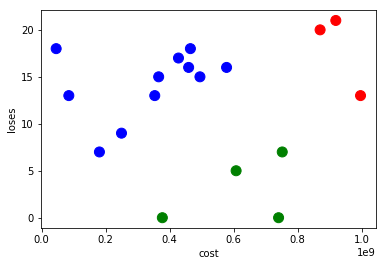

In [14]:
teams_pd.plot.scatter(x='cost', y='loses', c=colors, s=100)

In [15]:
centroidscentroid , cluster_map = kmeans2(whitened, 5)
centroids, cluster_map

(array([[ 2.9108973 ,  3.45046886],
        [ 0.48514955,  2.30141117],
        [ 2.30813574,  1.25183184]]),
 array([3, 2, 3, 3, 2, 4, 3, 0, 3, 2, 3, 3, 3, 0, 1, 1, 0, 3]))

In [16]:
colors_mapcolors_m  = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['y',
 'b',
 'y',
 'y',
 'b',
 'm',
 'y',
 'r',
 'y',
 'b',
 'y',
 'y',
 'y',
 'r',
 'g',
 'g',
 'r',
 'y']

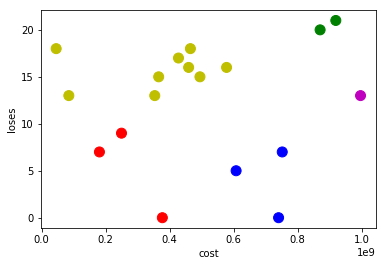

In [17]:
teams_pd.plot.scatter(x='cost', y='loses', c=colors, s=100)